In [1]:
#load packages
import numpy as np
import matplotlib.pyplot as plt

# Assignment ANLY 590
## Author: Xintong Zhao
---

## Problem 1 Part 1,2

<img src="part1.jpeg">
<img src="part2.png">
<img src="part3a.jpeg">

## Problem 1 Part 3

In [2]:
import numpy as np

# ReLu Function
relu = np.vectorize(lambda z: np.fmax(0,z))

# Softmax Function
def softmax(x):
    return np.exp(x)/(np.exp(x).sum(axis=0))

def ff_nn_2_ReLu(x,W1,W2,V,b1,b2,c):
    a1 = np.dot(W1,x) + b1
    h1 = relu(a1)
    a2 = np.dot(W2,h1) + b2
    h2 = relu(a2)
    a3 = np.dot(V,h2) + c
    y = softmax(a3)
    return y

## Problem 1 Part 3

In [3]:
X = np.array([[1,0,0],[-1,-1,1]])
W1 = np.array([[1,0],[-1,0],[0,.5]])
W2 = np.array([[1,0,0],[-1,-1,0]])
V = np.array([[1,1],[0,0],[-1,-1]])
b1 = np.array([[0],[0],[1]])
b2 = np.array([[1],[-1]])
c = np.array([[1],[0],[0]])

y = ff_nn_2_ReLu(X,W1,W2,V,b1,b2,c)
print(y)

[[0.94649912 0.84379473 0.84379473]
 [0.04712342 0.1141952  0.1141952 ]
 [0.00637746 0.04201007 0.04201007]]


In [4]:
print('Probabilities for the first class is',y[0])
print('Probabilities for the second class is',y[1])
print('Probabilities for the third class is',y[2])

Probabilities for the first class is [0.94649912 0.84379473 0.84379473]
Probabilities for the second class is [0.04712342 0.1141952  0.1141952 ]
Probabilities for the third class is [0.00637746 0.04201007 0.04201007]


## Problem 2 Part 1

$\frac{\partial f(x,y)}{\partial x} =-2(1-x) +200(y-x^2)(-2x)= -400xy + 400x^3+2x-2$<br>
$\frac{\partial f(x,y)}{\partial x} = 200y-200x^2$

## Part 2


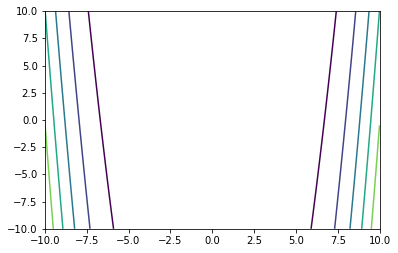

In [5]:
delta = 0.025
x = np.arange(-10.0, 10.0, delta)
y = np.arange(-10.0, 10.0, delta)
X, Y = np.meshgrid(x, y)
Z = (1-X)**2 + 100*(Y-X**2)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

## Part 3

In [6]:
def grad_f(vector):
    x, y = vector
    df_dx = -400 * x * y + 400 * (x ** 3) + 2 * x - 2
    df_dy = 200 * y - 200 * x **2
    
    return np.array([df_dx, df_dy])

def grad_descent(starting_point=None, iterations=10, learning_rate=0.0005):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-1,1,size=2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
        
    return np.array(trajectory)

/Users/FrankWang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/FrankWang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


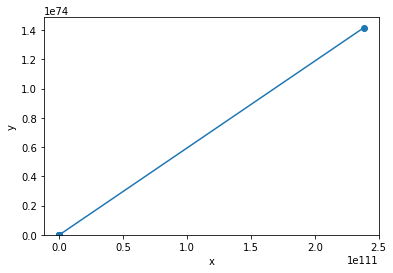

In [7]:
np.random.seed(123)
traj = grad_descent(iterations=10000, learning_rate=0.01)

plt.contour(X,Y,Z)
plt.xlabel('x')
plt.ylabel('y')
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')


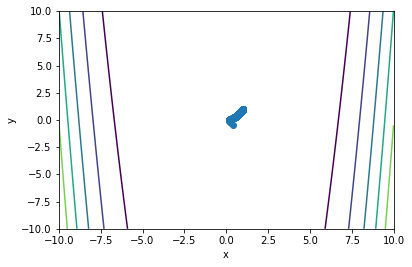

In [8]:
np.random.seed(123)
traj = grad_descent(iterations=10000, learning_rate=0.001)

plt.contour(X,Y,Z)
plt.xlabel('x')
plt.ylabel('y')
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')


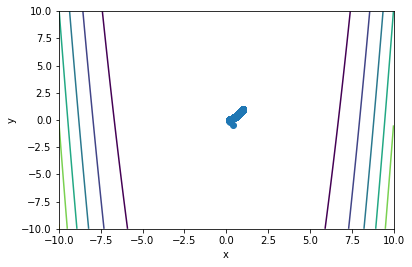

In [9]:
np.random.seed(123)
traj = grad_descent(iterations=10000, learning_rate=0.002)

plt.contour(X,Y,Z)
plt.xlabel('x')
plt.ylabel('y')
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')


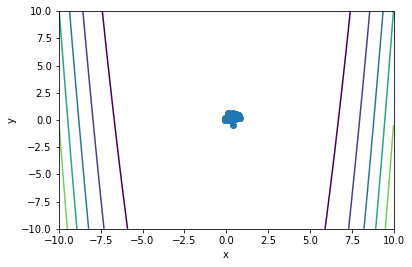

In [10]:
np.random.seed(123)
traj = grad_descent(iterations=10000, learning_rate=0.005)

plt.contour(X,Y,Z)
plt.xlabel('x')
plt.ylabel('y')
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')


When learning rate is large, the algorithm will skip the optimal point. It oscillates a lot and causes a diverge. When learning rate is small, it will not oscillate that much and converages. 

## Part 4

In [11]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-1,1,size=2)
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

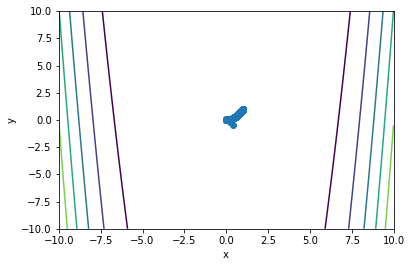

In [12]:
np.random.seed(123)
traj = grad_descent_with_momentum(iterations=3000, alpha=0.5,epsilon=0.002)

plt.contour(X,Y,Z)
plt.xlabel('x')
plt.ylabel('y')
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')


/Users/FrankWang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/FrankWang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


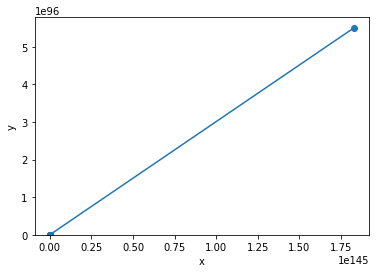

In [13]:
np.random.seed(123)
traj = grad_descent_with_momentum(iterations=3000, alpha=0.8,epsilon=0.01)

plt.contour(X,Y,Z)
plt.xlabel('x')
plt.ylabel('y')
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')


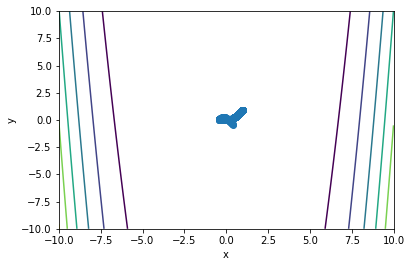

In [14]:
np.random.seed(123)
traj = grad_descent_with_momentum(iterations=3000, alpha=0.95,epsilon=0.0001)

plt.contour(X,Y,Z)
plt.xlabel('x')
plt.ylabel('y')
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')


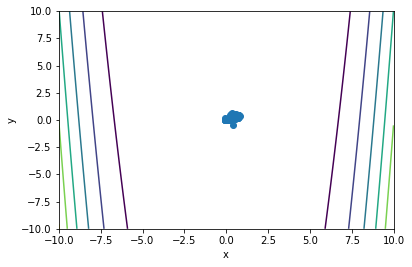

In [15]:
np.random.seed(123)
traj = grad_descent_with_momentum(iterations=3000, alpha=0.05,epsilon=0.005)

plt.contour(X,Y,Z)
plt.xlabel('x')
plt.ylabel('y')
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')


Similar to gradient descent, epsilon here is the learning rate for gradient descent with momentum. With a large, epsilon, the alogrithm diverages. 

## Problem 3
## Part 1

## Part 2

In [27]:
def grad_f(X,H1,H2,Y,Y_hat,weights):  
    W1,b1,W2,b2,V,c = weights
    dc = (Y_hat - Y).sum(axis=0).reshape(3,1)
    dV = np.dot(H2.T, (Y_hat - Y)).T
    db2 = (np.dot((Y_hat - Y), V) * (H2 > 0)).sum(axis=0).reshape(2,1)
    dW2 = np.dot((np.dot((Y_hat - Y),V)* (H2 > 0)).T,H1)
    
    db1 = (np.dot(np.dot((Y_hat - Y), V) * (H2 > 0) , W2) * (H1 > 0)).sum(axis=0).reshape(3,1)
    dW1 = np.dot((np.dot(np.dot((Y_hat - Y),V)* (H2 > 0),W2)*(H1>0)).T,X)
    return [dW1,db1,dW2,db2,dV,dc]

## Part 3

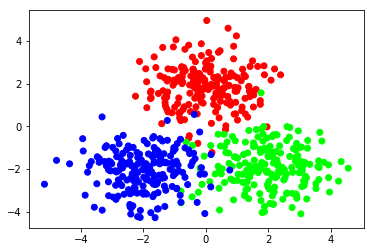

In [28]:
covm = [[1, 0], [0, 1]]
X = np.concatenate([np.random.multivariate_normal(mean = [0, 2], cov=covm, size = 200),
                     np.random.multivariate_normal(mean = [2, -2], cov=covm, size = 200),
                     np.random.multivariate_normal(mean = [-2, -2], cov=covm, size = 200)])
Y = np.concatenate([np.array([[1,0,0] for i in range(200)]),
                    np.array([[0,1,0] for i in range(200)]),
                    np.array([[0,0,1] for i in range(200)])])
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

## Part 4

In [29]:
ReLu = np.vectorize(lambda z: np.fmax(0,z))
softmax = lambda z: np.exp(z)/(np.sum(np.exp(z),axis=1))[:,np.newaxis]

def forward(X,weights):
    W1,b1,W2,b2,V,c = weights
    a1 = np.dot(X,W1.T) +b1.T
    H1 = ReLu(a1)
    a2 = np.dot(H1,W2.T) + b2.T
    H2 = ReLu(a2)
    a3 = np.dot(H2,V.T) + c.T
    Y_hat = softmax(a3)
    return H1,H2,Y_hat


def loss(y, y_hat):
    total = y*np.log(y_hat)
    return -total.sum()

def grad_descent(x, y, weights, iterations=10, learning_rate=1e-2):
    point = weights
    losses = [loss(y, forward(x,point)[2])]
    for i in range(iterations):
        H1,H2,Y_hat = forward(x,point)
        grad = grad_f(x,H1,H2, y,Y_hat,point)
        for j in range(len(point)):
            point[j]= point[j]-learning_rate*grad[j]
        losses.append(loss(y,forward(x,point)[2]))
    return losses

In [30]:
np.random.seed(123)
W1 =np.random.uniform(size =(3,2))
b1 = np.random.uniform(size = (3,1))
W2 = np.random.uniform(size =(2,3))
b2 = np.random.uniform(size = (2,1))
V =np.random.uniform(size =(3,2))
c =np.random.uniform(size = (3,1))
weights = [W1,b1,W2,b2,V,c]

Text(0.5,0,'Iteration')

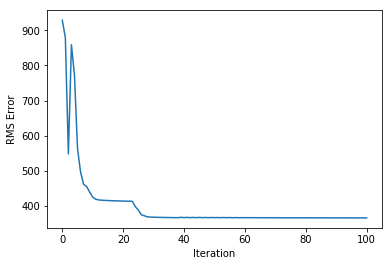

In [31]:
losses = grad_descent(X,Y,weights,iterations=100,learning_rate=0.01)
plt.plot(losses)
plt.ylabel("RMS Error")
plt.xlabel("Iteration")

In [32]:
def grad_descent_with_momentum(x, y, parameters, iterations=10, alpha=.9, epsilon=10):
    point = parameters
    losses = [loss(y, forward(X,point)[2])]
    v = [np.zeros(np.shape(i)) for i in parameters]
    
    for i in range(iterations):
        H1,H2,Y_hat = forward(x,point)
        grad = grad_f(x,H1,H2, y,Y_hat,point)
        v = np.add([alpha*i for i in v], [i*epsilon for i in grad])
        point = point - v
        losses.append(loss(y,forward(X,point)[2]))
    return losses

Text(0.5,0,'Iteration')

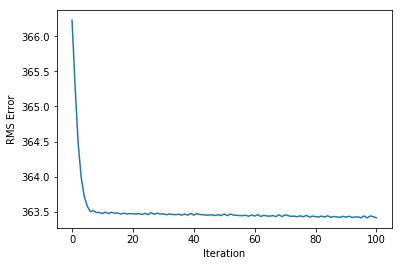

In [34]:
losses = grad_descent_with_momentum(X,Y,weights,iterations=100,alpha=.3, epsilon=0.001)
plt.plot(losses)
plt.ylabel("RMS Error")
plt.xlabel("Iteration")